# **TASK 1 - Prediction using Supervised ML**
**To Predict the percentage of marks of the students based on the number of hours they studied**

# **Author - Pratham Raka**

In [25]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [26]:
# Data Reading
dataset = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")
dataset

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# Check if there any null value in the Dataset
dataset.isnull == True

False

 **There are no null values in dataset so now we can visualize the data**

In [5]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# Data Cleaning if required
dataset.shape

(25, 2)

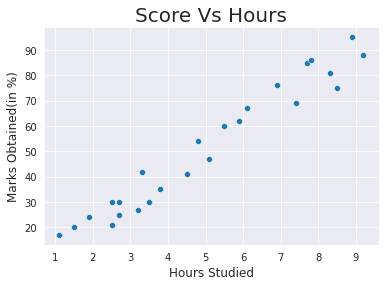

In [12]:
#Plotting scatter plot between Score & Hours
sns.set_style('darkgrid')
sns.scatterplot(y= dataset['Scores'], x= dataset['Hours'])
plt.title('Score Vs Hours',size=20)
plt.ylabel('Marks Obtained(in %)', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()


**From the above scatter plot there looks to be correlation between the 'Marks Obtained(in %)' and 'Hours Studied', Lets plot a regression line to confirm the correlation.**

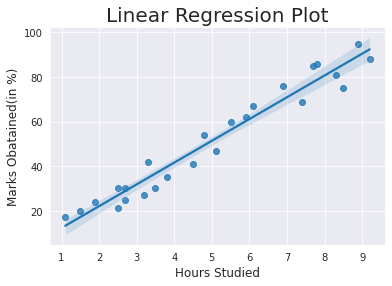

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [13]:
#Plotting Linear Regression Plot 
sns.regplot(x= dataset['Hours'], y= dataset['Scores'])
plt.title('Linear Regression Plot',size=20)
plt.ylabel('Marks Obatained(in %)', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(dataset.corr())

**Above graph shows that the varaibles are positively correlated**

#**Training the Model**

**1) Splitting the data**

In [14]:
# Defining X and y from the Data
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

**2) Fitting data into the Model**

In [15]:
#Fitting data into the Model
regression = LinearRegression()
regression.fit(train_X, train_y)
print("---------Model Trained---------")

---------Model Trained---------


# **Predicting the percentage of Marks**

In [16]:
#Predicting the Percentage of Marks
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks in %': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


# **Comparing the Predicted Marks with the Actual Marks**

In [28]:
#Comparing the Predicted Marks with the Actual Marks
compare_scores = pd.DataFrame({'Actual Marks in %': val_y, 'Predicted Marks in %': pred_y})
compare_scores

,Actual Marks in %,Predicted Marks in %
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


# **Visually comparing the Predicted Marks with the Actual Marks**

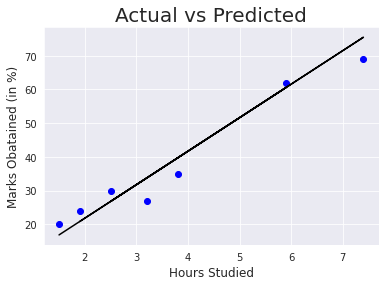

In [27]:
#Visually comparing the Predicted Marks with the Actual Marks in %
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Obatained (in %)', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

# **Evaluating the Model**

In [20]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


**Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.**

In [24]:
#What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?
hours = [9.25]
answer = regression.predict([hours])
print("Predicted Score in % = {}".format(round(answer[0],3)))

Score in % = 93.893


**According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.893 % of marks.**